# Capstone project - Brazilian Vaccine Logistics
For the Capstone Project of the [IBM Data Science Professional Certificate](https://www.coursera.org/professional-certificates/ibm-data-science), we were asked to clearly define a problem or an idea of our choice, where we would need to leverage the Foursquare location data to solve a problem.

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## 1. Business Problem <a name="introduction"></a>

### 1.1 COVID in Brazil
The COVID-19 pandemic, also known as the coronavirus pandemic, is an ongoing pandemic caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2). 
When this notebook was written, more than 180 thousand people had lost their lives to COVID-19 in Brazil. As of December 15th, 2020, Brazil had not detailed its coronavirus immunization plan and [did little to assuage concerns that the government is stumbling in its efforts to inoculate 212 million people, with no timeline and vague supply agreements.](https://www.bloomberg.com/news/articles/2020-12-14/brazil-s-vaccination-plan-elicits-more-questions-than-answers)

Brazil occupies half the continent's landmass. [It is the fifth largest country in the world, with an area greater than that of the 48 conterminous U.S. states.](https://www.britannica.com/place/Brazil) Brazil stretches roughly 2,700 miles (4,350 km) from north to south and from east to west to form a vast irregular triangle that encompasses a wide range of tropical and subtropical landscapes, including wetlands, savannas, plateaus, and low mountains. With such a continental country, the healthcare coverage and distribution is highly irregular.

Concentrated in the largest cities and most developed regions, there are few hospitals and beds in the poorer regions. [In fact, patients from 43% of the country's cities will need to travel if they have serious Covid-19 symptoms](https://oglobo.globo.com/sociedade/coronavirus-menos-de-um-quarto-dos-municipios-brasileiros-tem-leitos-de-uti-que-atendem-pelo-sus-24353614). This is because only 53.1% of the 5,570 Brazilian municipalities have hospitals with hospitalization beds by the public system - in general, they are larger cities, elected as regional health centers to meet the demand of all patients.

### 1.2 Healthcare workers
Frontline health and social care workers [are at increased personal risk of exposure to infection with COVID-19](https://www.thelancet.com/journals/lanpub/article/PIIS2468-2667%2820%2930164-X/fulltext) and of transmitting that infection to susceptible and vulnerable patients in health and social care settings.

In December 2020, the United Kingdom was the first country in the world to roll out the Pfizer-BioNTech COVID-19 Vaccine for emergency use. The UK committee [considered frontline health and social care workers who provide care to vulnerable people a high priority for vaccination](https://www.gov.uk/government/publications/priority-groups-for-coronavirus-covid-19-vaccination-advice-from-the-jcvi-2-december-2020/priority-groups-for-coronavirus-covid-19-vaccination-advice-from-the-jcvi-2-december-2020). This prioritisation was taken into account during vaccine deployment.

In Brazil, unlike hospitalization beds, the healthcare workforce is more evenly distributed among all states, in thousands of municipalities. They work mainly in healthcare centres, including clinics, doctor's offices, etc. Not all of them are located in cities with available hospitals.

### 1.3 Goal
This project aims to use *Foursquare location data* combined with the *number of healthcare workers by municipality* and *GPS data* to suggest **the closest cities with hospitals that could be used as vaccination centers for those professionals** and, because they are one of the first groups to receive the vaccine, for treatment in cases of anaphylactoid reaction or other complications. This notebook will also display a dataframe with the number of people that would be immunized in each city to help with transportation and logistics.

### 1.4 Disclaimer
This information was created as part of a Data Science course. It is publicly available, as required, but for academic purposes only and must not be used to make actual decisions. The COVID-19 pandemic is a serious matter and lives are at stake. In particular, the Foursquare data may not be accurate (although its use was mandatory for this activity) and a lot of simplifications were taken in this **learning exercise**, including but not limited to the fact that we are mapping hospitals instead of using the more than [36,000 vaccination rooms](https://www.scielo.br/pdf/ress/v28n2/en_2237-9622-ress-28-02-e20190223.pdf) in Brazil. For actual vaccine deployment plans, please refer to the Brazilian [Ministry of Health](https://www.gov.br/saude/pt-br).

## 2. Data <a name="introduction"></a>
1. [Foursquare API](https://developer.foursquare.com/developer/) - Will be used to count the number of hospitals within 5 km of the city center (ie. find cities with hospitals)
1. [The National Registry of Health Facilities (CNES)](http://www2.datasus.gov.br/DATASUS/index.php?area=0204&id=11673) (In portuguese) - Includes number of healthcare workers by municipality.
1. [Municípios Brasileiros](https://github.com/kelvins/Municipios-Brasileiros) (In portuguese) - Latitude and longitude of Brazilian municipalities. Has 5,570 entries

This project aims to use the above data to suggest the closest city with at least one hospital that could be used as vaccination centers for those professionals. We will also display a dataframe with the number of people that would be immunized in each city, to help with planning the vaccine transportation and logistics.

### 2.1 Healthcare workers to be vaccinated

Let's size up the challenge ahead for the vaccination plan of healthcare workers.

The first step was to enter the [The National Registry of Health Facilities (CNES)](http://www2.datasus.gov.br/DATASUS/index.php?area=0204&id=11673) website. Unfortunately, there is no API and/or URL that can be used to automatically download this information without manual user interaction. So I filled their CGI forms from a couple of decades ago, pressed some buttons in an [HTML image map](https://www.w3schools.com/html/html_images_imagemap.asp) and downloaded the latest available (October, 2020) CSV file with the number of healthcare workers by municipality. Because the first row is in Portuguese, I have also translated that to English to make it easier to explain this data in the notebook. We added the translated file to this Github repository, and it is now available [here](https://github.com/Hbas/Coursera_Capstone/blob/main/data/cnes/brasil_healthcare_hr-2020.10.csv).

With the CSV available, we import that to a pandas dataframe

In [1]:
import pandas as pd

cnes_healthcare_workers = pd.read_csv('https://raw.githubusercontent.com/Hbas/Coursera_Capstone/main/data/cnes/brasil_healthcare_hr-2020.10.csv')
cnes_healthcare_workers

Municipality  ".. Anesthesiologist"  \
0       110001 Alta Floresta D'Oeste                      1   
1     110037 Alto Alegre dos Parecis                      -   
2                110040 Alto Paraíso                      -   
3            110034 Alvorada D'Oeste                      1   
4                   110002 Ariquemes                     17   
...                              ...                    ...   
5565           522205 Vicentinópolis                      -   
5566                 522220 Vila Boa                      -   
5567            522230 Vila Propício                      -   
5568                 530010 Brasília                    866   
5569                           Total                  58907   

      ".. General Surgeon"  ".. General Physician"  ".. Gineco Obstetra"  \
0                        2                      15                     1   
1                        -                       4                     1   
2                        -                      10                     1   
3                        1                       3                     2   
4                       13                     134                    33   
...                    ...                     ...                   ...   
5565                     4                      11                     1   
5566                     -                       2                     -   
5567                     -                       3                     1   
5568                  1273                    4049                  2064   
5569                 66142                  297786                 91778   

      ".. Family Physician"  ".. Pediatrician"  ".. Psychiatrist"   \
0                         9                  2                   1   
1                         7                  -                   -   
2                         5                  -                   -   
3                         5                  1                   -   
4                        20                 18                   5   
...                     ...                ...                 ...   
5565                      3                  1                   -   
5566                      2                  -                   -   
5567                      2                  2                   -   
5568                    701               1752                 400   
5569                  54238              97915               23651   

      ".. Radiologist"  ".. Sanitary"  ...  "Nurse"  "Physiotherapist"  \
0                    2              -  ...       35                  5   
1                    -              -  ...       15                  2   
2                    1              -  ...       15                  5   
3                    -              -  ...       19                  3   
4                   18              -  ...      163                 50   
...                ...            ...  ...      ...                ...   
5565                 -              -  ...        7                  3   
5566                 -              -  ...        6                  -   
5567                 -              -  ...        4                  4   
5568               949             16  ...     8043               2817   
5569             50269            550  ...   371169             119276   

       "Speech therapist"  "Nutritionist"  "Pharmacist"  "Social worker"  \
0                       1               3             7                5   
1                       1               1             8                1   
2                       -               1             4                -   
3                       -               1             1                2   
4                       9              11            19               10   
...                   ...             ...           ...              ...   
5565                    1               -             2                -   
5566            

Let's proceed with our [data wrangling](https://en.wikipedia.org/wiki/Data_wrangling) for that. We should:
1. Remove the columns with each profession/ocupation and leave only the total, as we are equally interested in all healthcare workers
1. Separate the municipality name from it's code - also known as [IBGE code](https://www.wikidata.org/wiki/Property:P1585) (the first six numbers)
1. Remove the last row (sum or total) from the original CNES data, as that can be automatically calculated by pandas
1. Sort by IBGE code

In [2]:
df_workers = pd.DataFrame({'IBGE code': cnes_healthcare_workers['Municipality'].str[0:6],
                             'name': cnes_healthcare_workers['Municipality'].str[7:],
                             'healthcare workers': cnes_healthcare_workers[' Total ']})
df_workers.drop(df_workers.tail(1).index,inplace=True)
df_workers.sort_values(by=['IBGE code'],inplace=True)
df_workers.head()

IBGE code                   name  healthcare workers
0     110001  Alta Floresta D'Oeste                 174
4     110002              Ariquemes                1046
6     110003                 Cabixi                  45
8     110004                 Cacoal                2302
12    110005             Cerejeiras                 120

In [3]:
df_workers.describe(include='all')

IBGE code          name  healthcare workers
count       5569          5569         5569.000000
unique      5569          5297                 NaN
top       353270  São Domingos                 NaN
freq           1             5                 NaN
mean         NaN           NaN          519.436344
std          NaN           NaN         4239.938520
min          NaN           NaN            8.000000
25%          NaN           NaN           38.000000
50%          NaN           NaN           75.000000
75%          NaN           NaN          177.000000
max          NaN           NaN       221994.000000

In [4]:
print('There are {:,} healthcare workers in {:,} unique municipalities'.format(df_workers['healthcare workers'].sum(),len(df_workers['IBGE code'].unique())))

There are 2,892,741 healthcare workers in 5,569 unique municipalities


### 2.2 Geographical coordinates of municipalities

Now, let's get the latitude & longitude coordinates for each municipality from the [Municípios Brasileiros](https://github.com/kelvins/Municipios-Brasileiros) dataset. We will also translate some columns from Portuguese to English and drop the unnecessary columns.

In [5]:
df_cities = pd.read_csv("https://raw.githubusercontent.com/kelvins/Municipios-Brasileiros/main/csv/municipios.csv")
df_cities.rename(columns={'codigo_ibge': 'IBGE code', 'nome': 'name'},inplace=True)
df_cities.drop(['capital','codigo_uf'], axis=1,inplace=True)
df_cities.describe(include='all')

IBGE code       name     latitude    longitude
count   5.570000e+03       5570  5570.000000  5570.000000
unique           NaN       5299          NaN          NaN
top              NaN  Bom Jesus          NaN          NaN
freq             NaN          5          NaN          NaN
mean    3.253591e+06        NaN   -16.449144   -46.231003
std     9.849103e+05        NaN     8.287237     6.408539
min     1.100015e+06        NaN   -33.686600   -72.899700
25%     2.512126e+06        NaN   -22.843875   -50.878525
50%     3.146280e+06        NaN   -18.094300   -46.523200
75%     4.119190e+06        NaN    -8.496445   -41.410775
max     5.300108e+06        NaN     4.603140   -32.410700

Oops, the IBGE code is showing as a number. But actually the first two digits are the state code and, in this specific database, the last one is a checksum... We will convert the IBGE code to a string, to make it easier to handle. Moreover, we will drop the checksum as the CNES database with healthcare workers does not use it.

In [6]:
df_cities['IBGE code'] = df_cities['IBGE code'].astype(str)
df_cities['state'] = df_cities['IBGE code'].str[0:2].astype(int)
df_cities['IBGE code'] = df_cities['IBGE code'].str[:-1]
df_cities.sort_values(by=['IBGE code'],inplace=True)
df_cities.head()

IBGE code                   name  latitude  longitude  state
131     110001  Alta Floresta D'Oeste -11.92830   -61.9953     11
381     110002              Ariquemes  -9.90571   -63.0325     11
826     110003                 Cabixi -13.49450   -60.5520     11
863     110004                 Cacoal -11.43430   -61.4562     11
1224    110005             Cerejeiras -13.18700   -60.8168     11

To accurately calculate distances we also need to create our grid of locations in the Cartesian 2D coordinate system, which allows us to calculate distances in meters (not in latitude/longitude degrees). We will add those columns to our city list. Because Brazil has continental size, we also need to keep the UTM zone number.

In [7]:
import utm

def extend_with_coordinates(df):
    xList = []
    yList = []
    zoneList = []
    for index, row in df.iterrows():
        x, y, zone, label = utm.from_latlon(row['latitude'],row['longitude'])
        xList.append(x)
        yList.append(y)
        zoneList.append(zone)
    return df.assign(x = xList, y = yList, zone = zoneList) 
df_cities = extend_with_coordinates(df_cities)    
df_cities

IBGE code                   name  latitude  longitude  state  \
131     110001  Alta Floresta D'Oeste -11.92830   -61.9953     11   
381     110002              Ariquemes  -9.90571   -63.0325     11   
826     110003                 Cabixi -13.49450   -60.5520     11   
863     110004                 Cacoal -11.43430   -61.4562     11   
1224    110005             Cerejeiras -13.18700   -60.8168     11   
...        ...                    ...       ...        ...    ...   
5488    522200             Vianópolis -16.74050   -48.5159     52   
5492    522205         Vicentinópolis -17.73220   -49.8047     52   
5504    522220               Vila Boa -15.03870   -47.0520     52   
5513    522230          Vila Propício -15.45420   -48.8819     52   
755     530010               Brasília -15.77950   -47.9297     53   

                  x             y  zone  
131   609404.710543  8.681177e+06    20  
381   496437.123740  8.905012e+06    20  
826   765001.377666  8.506857e+06    20  
863   668417.847264  8.735549e+06    20  
1224  736622.321541  8.541156e+06    20  
...             ...           ...   ...  
5488  764846.513826  8.147497e+06    22  
5492  626734.756702  8.039040e+06    22  
5504  279393.312374  8.336368e+06    23  
5513  727268.509483  8.290317e+06    22  
755   186087.978472  8.253271e+06    23  

[5570 rows x 8 columns]

Looking good. Let's now check if all municipalities have healthcare workers and geographical coordinates

In [8]:
print('There is {} municipality without healthcare workers'.format(len(df_cities[~df_cities['IBGE code'].isin(df_workers['IBGE code'])])))
print('There are {} municipalities with healthcare workers but without coordinates'.format(len(df_workers[~df_workers['IBGE code'].isin(df_cities['IBGE code'])])))

There is 1 municipality without healthcare workers
There are 0 municipalities with healthcare workers but without coordinates


So we drop the single municipality that has no healthcare workers and our dataframe is complete

In [9]:
df_cities = df_cities[df_cities['IBGE code'].isin(df_workers['IBGE code'])]
df_cities.shape

(5569, 8)

### 2.3 Scope reduction

The next step will be to increment the cities dataframe with the number of hospitals information. Unfortunately, reading 5,569 cities would take a long time and our API calls to Foursquare are limited. As such, we will reduce our evaluation scope in this notebook to the cities in a single state.

In [10]:
PERNAMBUCO_STATE_CODE = 26 # See https://en.wikipedia.org/wiki/ISO_3166-2:BR for the IBGE numbers
df_cities = df_cities[df_cities['state']==PERNAMBUCO_STATE_CODE]
df_cities.shape

(185, 8)

We will also reduce the number of healthcare professionals to handle only that state.

In [11]:
df_workers = df_workers[df_workers['IBGE code'].isin(df_cities['IBGE code'])]
print('There are {:,} healthcare workers in {:,} unique municipalities within the chosen state'.format(df_workers['healthcare workers'].sum(),len(df_workers['IBGE code'].unique())))

There are 107,811 healthcare workers in 185 unique municipalities within the chosen state


In [12]:
df_workers.describe()

healthcare workers
count          185.000000
mean           582.762162
std           3536.043541
min             30.000000
25%             80.000000
50%            106.000000
75%            177.000000
max          47065.000000

Even though we are restricting ourselves to a single state, all algorithms and the analysis that we are going to do should be easily applicable to the whole country

### 2.4 Number of hospitals in each municipality

Now we can proceed with the Foursquare search.

In [13]:
import os

# Please note that my API id and secret are set on environment variables for security reasons.
# As such, I start the Jupyter notebook with "env CLIENT_ID='id' CLIENT_SECRET='secret' jupyter-lab"
CLIENT_ID = os.getenv('CLIENT_ID')
CLIENT_SECRET = os.getenv('CLIENT_SECRET')

if (CLIENT_ID != None) and (CLIENT_SECRET != None):
  print('Foursquare credentials loaded')

Foursquare credentials loaded


In [14]:
import requests
import time

def get_hospitals_near_location(municipality_code, names, latitudes, longitudes, radius, limit=1):
    version = '20180724'
   # Category ID corresponding to Hospitals was taken from Foursquare web site (https://developer.foursquare.com/docs/resources/categories):
    hospital_category = '4bf58dd8d48988d196941735'
    hospital_list = []
    
    for code, name, lat, lng in zip(municipality_code, names, latitudes, longitudes):
        print(name, end=',')
        url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}&limit={}'.format(
            CLIENT_ID, CLIENT_SECRET, version, lat, lng, hospital_category, radius, limit)
        results = requests.get(url).json()['response']['totalResults']
        time.sleep(1) # API throttle = At most 1 Query per Second (QPS)
        hospital_list.append([(code,name,results)])
            
    hospitals = pd.DataFrame([item for hospital_list in hospital_list for item in hospital_list])
    hospitals.columns = ['IBGE code',
                  'Municipality',
                  'Hospitals within 5km']
    return hospitals

In [15]:
def load_hospitals(df_cities):
    loaded = False
    try:
        return pd.read_csv('hospitals.csv')
    except:
        pass

    # If load failed use the Foursquare API to get the data
    if not loaded:
        print('Obtaining hospitals near the city centers:')
        df_hospitals = get_hospitals_near_location(municipality_code=df_cities['IBGE code'],
                                                    names=df_cities['name'],
                                                    latitudes=df_cities['latitude'],
                                                    longitudes=df_cities['longitude'],
                                                    radius=5000
                                                  )
        print('')
        print('done.')
        df_hospitals.to_csv('hospitals.csv',index=False)
        return df_hospitals

In [16]:
df_hospitals = load_hospitals(df_cities)
df_hospitals['IBGE code'] = df_hospitals['IBGE code'].astype(str)
df_hospitals

Obtaining hospitals near the city centers:
Abreu e Lima,Afogados da Ingazeira,Afrânio,Agrestina,Água Preta,Águas Belas,Alagoinha,Aliança,Altinho,Amaraji,Angelim,Araçoiaba,Araripina,Arcoverde,Barra de Guabiraba,Barreiros,Belém de Maria,Belém do São Francisco,Belo Jardim,Betânia,Bezerros,Bodocó,Bom Conselho,Bom Jardim,Bonito,Brejão,Brejinho,Brejo da Madre de Deus,Buenos Aires,Buíque,Cabo de Santo Agostinho,Cabrobó,Cachoeirinha,Caetés,Calçado,Calumbi,Camaragibe,Camocim de São Félix,Camutanga,Canhotinho,Capoeiras,Carnaíba,Carnaubeira da Penha,Carpina,Caruaru,Casinhas,Catende,Cedro,Chã de Alegria,Chã Grande,Condado,Correntes,Cortês,Cumaru,Cupira,Custódia,Dormentes,Escada,Exu,Feira Nova,Fernando de Noronha,Ferreiros,Flores,Floresta,Frei Miguelinho,Gameleira,Garanhuns,Glória do Goitá,Goiana,Granito,Gravatá,Iati,Ibimirim,Ibirajuba,Igarassu,Iguaracy,Inajá,Ingazeira,Ipojuca,Ipubi,Itacuruba,Itaíba,Ilha de Itamaracá,Itambé,Itapetim,Itapissuma,Itaquitinga,Jaboatão dos Guararapes,Jaqueira,Jataúba,Ja

IBGE code            Municipality  Hospitals within 5km
0      260005            Abreu e Lima                     6
1      260010   Afogados da Ingazeira                     4
2      260020                 Afrânio                     0
3      260030               Agrestina                     1
4      260040              Água Preta                     2
..        ...                     ...                   ...
180    261618       Vertente do Lério                     0
181    261620               Vertentes                     0
182    261630                Vicência                     0
183    261640  Vitória de Santo Antão                     6
184    261650                   Xexéu                     1

[185 rows x 3 columns]

In [17]:
df_hospitals.describe(include='all')

IBGE code       Municipality  Hospitals within 5km
count        185                185            185.000000
unique       185                185                   NaN
top       261530  Ilha de Itamaracá                   NaN
freq           1                  1                   NaN
mean         NaN                NaN              2.551351
std          NaN                NaN             11.207956
min          NaN                NaN              0.000000
25%          NaN                NaN              0.000000
50%          NaN                NaN              1.000000
75%          NaN                NaN              2.000000
max          NaN                NaN            143.000000

This concludes the data gathering phase - we're now ready to use this data for analysis.

## Methodology <a name="methodology"></a>

In this project we will direct our efforts on distributing the vaccination of healthcare workers amoung cities with hospitals in Brazil. We will limit our analysis to a single state but all algorithms and logic could be applied to the whole country.

In first step we have collected the required **data: location and number of healthcare workers for each municipality**. We have also **identified the number of hospitals by municipality** (according to Foursquare information) and cleaned the data to make it easier to use.

Second step in our analysis will be the exploration of hospital and healthcare workers across different municipalities, then we will focus our attention in the **cities without hospitals**.

In third and final step we will identify the nearest hospital for the healthcare workers that are in those municipalities and **calculate the number of healthcare workers that could be vaccinated in each municipality**.

## Analysis <a name="analysis"></a>

Let's perform some basic exploratory data analysis and derive some additional info from our raw data. First let's analyse the distribution of the number of hospitals

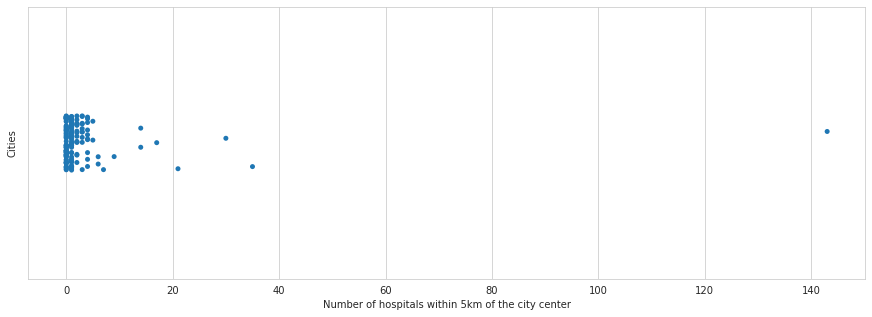

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

# Plot with horizontal boxes
fig, ax = plt.subplots(figsize=(15,5))
sns.stripplot(ax=ax, x="Hospitals within 5km", data=df_hospitals)
ax.set(xlabel='Number of hospitals within 5km of the city center',ylabel='Cities')
plt.show()

We can see that one city that has significantly more hospitals than the rest of the state. That's Recife, the capital and largest city, as shown below

In [19]:
df_hospitals[df_hospitals['Hospitals within 5km']>100]

IBGE code Municipality  Hospitals within 5km
131    261160       Recife                   143

At the other extreme, there are many cities without hospitals, as shown below:

In [20]:
print('There are {} municipalities ({:.1%} of the total) without a nearby hospital'.format(len(df_hospitals[df_hospitals['Hospitals within 5km']==0]),len(df_hospitals[df_hospitals['Hospitals within 5km']==0])/len(df_hospitals)))

There are 77 municipalities (41.6% of the total) without a nearby hospital


Let's do a similar analysis with the number of healthcare workers that will be vaccinated

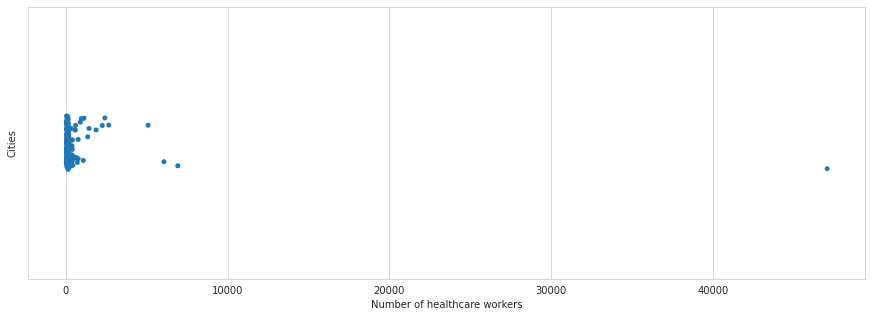

In [21]:
fig, ax = plt.subplots(figsize=(15,5))
sns.stripplot(ax=ax, x="healthcare workers", data=df_workers)
ax.set(xlabel='Number of healthcare workers',ylabel='Cities')
plt.show()

As before, Recife, the capital, has way more workers than the remaining municipalities

In [22]:
df_workers[df_workers['name']=='Recife']

IBGE code    name  healthcare workers
1597    261160  Recife               47065

Now, let's combine the latitude and longitude information with the number of hospitals nearby, so we can further analyse those municipalities and plot them on a map. We will use blue for the cities with hospitals and red for the cities without hospitals. Recife, the capital, will be in green.

In [23]:
df_all = df_hospitals.merge(df_cities,on='IBGE code').merge(df_workers,on='IBGE code')
df_all.drop(columns=['name_x','name_y','state'],inplace=True)
df_all.rename(columns={'Hospitals within 5km':'hospitals','Municipality':'name'},inplace=True)
df_all

IBGE code                    name  hospitals  latitude  longitude  \
0      260005            Abreu e Lima          6  -7.90072   -34.8984   
1      260010   Afogados da Ingazeira          4  -7.74312   -37.6310   
2      260020                 Afrânio          0  -8.51136   -41.0095   
3      260030               Agrestina          1  -8.45966   -35.9447   
4      260040              Água Preta          2  -8.70609   -35.5263   
..        ...                     ...        ...       ...        ...   
180    261618       Vertente do Lério          0  -7.77084   -35.8491   
181    261620               Vertentes          0  -7.90158   -35.9681   
182    261630                Vicência          0  -7.65655   -35.3139   
183    261640  Vitória de Santo Antão          6  -8.12819   -35.2976   
184    261650                   Xexéu          1  -8.80460   -35.6212   

                 x             y  zone  healthcare workers  
0    290710.465567  9.126201e+06    25                 588  
1    650969.552209  9.143857e+06    24                 566  
2    278795.773930  9.058595e+06    24                 155  
3    175732.780845  9.063659e+06    25                 251  
4    222017.261989  9.036713e+06    25                 143  
..             ...           ...   ...                 ...  
180  185733.023304  9.139979e+06    25                  49  
181  172697.993621  9.125416e+06    25                 100  
182  244733.864683  9.152984e+06    25                 128  
183  246820.478722  9.100812e+06    25                1438  
184  211643.985583  9.025740e+06    25                 100  

[185 rows x 9 columns]

In [24]:
df_without_hospitals = df_all[df_all['hospitals']==0]
df_with_hospitals = df_all[df_all['hospitals']>0]
df_recife = df_all[df_all['name']=='Recife']

In [25]:
import folium

map_state = folium.Map(location=[-8.33305556,-37.75000000], zoom_start=8)  
# add cities with hospitals in blue to map
for lat, lng, name in zip(df_with_hospitals['latitude'], df_with_hospitals['longitude'], df_with_hospitals['name']):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=name,
        color='blue',
        fill=True,
        fill_color='#56B4E9',
        fill_opacity=0.7,
        parse_html=False).add_to(map_state)  

# add the capital in green to map
for lat, lng, name in zip(df_recife['latitude'], df_recife['longitude'], df_recife['name']):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=name,
        color='green',
        fill=True,
        fill_color='#00E900',
        fill_opacity=0.7,
        parse_html=False).add_to(map_state)  
    
# add cities without hospitals in red to map
for lat, lng, name in zip(df_without_hospitals['latitude'], df_without_hospitals['longitude'], df_without_hospitals['name']):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=name,
        color='red',
        fill=True,
        fill_color='#D55E00',
        fill_opacity=0.7,
        parse_html=False).add_to(map_state)      
map_state

We can see on the map that the hospitals are more concentrated near the coastline but the whole state has cities with them.

The next step is to analyse the concentration of healthcare workers by municipality

In [26]:
from folium.plugins import HeatMap

def municipalities_style(feature):
    return { 'color': 'blue', 'fill': False }

def workers_weight(df):
    workers_lat_lon = []
    for index, row in df.iterrows():
        for i in range(row['healthcare workers']):
            workers_lat_lon.append([row['latitude'],row['longitude']])
    return workers_lat_lon            

municipalities_geojson = requests.get('https://raw.githubusercontent.com/tbrugz/geodata-br/master/geojson/geojs-26-mun.json').json()

map_state = folium.Map(location=[-8.33305556,-37.75000000], zoom_start=7)
folium.TileLayer('cartodbpositron').add_to(map_state) #cartodbpositron cartodbdark_matter
HeatMap(workers_weight(df_all)).add_to(map_state)
folium.GeoJson(municipalities_geojson, style_function=municipalities_style, name='geojson').add_to(map_state)
map_state

Fortunately, the concentration of healthcare workers also seems to be nearer the cities with hospitals, that is, near the coastline and the larger population centers.

Now, let's focus on those municipalities without hospitals. First, let's see how many healthcare workers will have to travel to a city with a hospital.

In [27]:
print('{:,} healthcare workers are located in cities without hospitals'.format(df_without_hospitals['healthcare workers'].sum()))

7,343 healthcare workers are located in cities without hospitals


Now, we find the nearest city with a hospital for each municipality without one and the number of healthcare workers that would travel from this municipality to receive the vaccine.

In [28]:
import sys
import math

def distance(x1,y1,x2,y2):
    dx = x2 - x1
    dy = y2 - y1
    return math.sqrt(dx*dx + dy*dy)

def closest_with_hospital(x,y,zone):
    minDistance = sys.maxsize
    minCode = ''
    for index, row in df_with_hospitals.iterrows():
        if(row['zone'] == zone):
            dist = distance(x,y,row['x'],row['y'])
            if(dist < minDistance):
                minDistance = dist
                minCode = row['IBGE code']
    return minCode

def closest_hospitals(dataframe):
    lists = []
    for index, row in dataframe.iterrows():
         lists.append([row['IBGE code'],closest_with_hospital(row['x'],row['y'],row['zone']),row['healthcare workers']])
    return pd.DataFrame(lists,columns=['from','to','healthcare workers'])

df_transfers = closest_hospitals(df_without_hospitals)
df_transfers

from      to  healthcare workers
0   260020  260515                 155
1   260060  261090                  95
2   260070  260460                 143
3   260080  260310                 101
4   260130  260230                  89
..     ...     ...                 ...
72  261600  261080                 133
73  261610  261220                  46
74  261618  261450                  49
75  261620  261450                 100
76  261630  260950                 128

[77 rows x 3 columns]

Finaly, we are able to connect the cities without hospitals to the nearest ones with hospitals on our map. We will draw a line to show this.

In [29]:
def transferPoints(dataframe):
    points = []
    for index, row in dataframe.iterrows():
        fromCity = df_all.loc[df_all['IBGE code'] == row['from']]
        toCity = df_all.loc[df_all['IBGE code'] == row['to']]
        points.append([[float(fromCity.latitude),float(fromCity.longitude)],[float(toCity.latitude),float(toCity.longitude)]])
    return points

map_state = folium.Map(location=[-8.33305556,-37.75000000], zoom_start=8)
# add cities with hospitals in blue to map
for lat, lng, name in zip(df_with_hospitals['latitude'], df_with_hospitals['longitude'], df_with_hospitals['name']):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=name,
        color='blue',
        fill=True,
        fill_color='#56B4E9',
        fill_opacity=0.7,
        parse_html=False).add_to(map_state)  
    
# add cities without hospitals in red to map
for lat, lng, name in zip(df_without_hospitals['latitude'], df_without_hospitals['longitude'], df_without_hospitals['name']):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=name,
        color='red',
        fill=True,
        fill_color='#D55E00',
        fill_opacity=0.7,
        parse_html=False).add_to(map_state)

# add cities without hospitals in red to map
for points in transferPoints(df_transfers):
    folium.PolyLine(points, color='black', weight=2, opacity=0.75).add_to(map_state)
    
map_state

And calculate the number of healthcare workers that will be vaccinated in each city.

In [30]:
def get_transfers(code):    
    return df_transfers[df_transfers['to'] == code]['healthcare workers'].sum()

def calculate_totals():
    v_list = []
    for index, row in df_with_hospitals.iterrows():
        v_list.append([row['IBGE code'],row['name'],row['hospitals'],row['healthcare workers'] + get_transfers(row['IBGE code']),int((row['healthcare workers'] + get_transfers(row['IBGE code']))/row['hospitals'])])
    
    return pd.DataFrame(v_list, columns = ['IBGE code', 'Municipality','Hospitals in city','Healthcare workers to vaccinate','Vaccine per hospital'])

df_after_transfers = calculate_totals()
df_after_transfers.describe()

Hospitals in city  Healthcare workers to vaccinate  \
count         108.000000                       108.000000   
mean            4.370370                       998.250000   
std            14.421941                      4601.225587   
min             1.000000                        48.000000   
25%             1.000000                       128.250000   
50%             1.000000                       253.000000   
75%             3.000000                       489.000000   
max           143.000000                     47065.000000   

       Vaccine per hospital  
count            108.000000  
mean             212.722222  
std              279.538232  
min               23.000000  
25%               83.250000  
50%              158.500000  
75%              263.250000  
max             2545.000000

Finaly, we check that every worker is accounted for and print the final table

In [31]:
print('Every healthcare worker will be vaccinated: ', df_after_transfers['Healthcare workers to vaccinate'].sum() == df_all['healthcare workers'].sum())

Every healthcare worker will be vaccinated:  True


In [32]:
with pd.option_context('display.max_rows', None):
    display(df_after_transfers)

IBGE code               Municipality  Hospitals in city  \
0      260005               Abreu e Lima                  6   
1      260010      Afogados da Ingazeira                  4   
2      260030                  Agrestina                  1   
3      260040                 Água Preta                  2   
4      260050                Águas Belas                  1   
5      260090                    Amaraji                  1   
6      260100                    Angelim                  1   
7      260105                  Araçoiaba                  2   
8      260110                  Araripina                  3   
9      260120                  Arcoverde                  4   
10     260140                  Barreiros                  2   
11     260150             Belém de Maria                  1   
12     260170                Belo Jardim                  2   
13     260190                   Bezerros                  3   
14     260230                     Bonito                  1   
15     260260     Brejo da Madre de Deus                  1   
16     260290    Cabo de Santo Agostinho                 17   
17     260300                    Cabrobó                  4   
18     260310               Cachoeirinha                  1   
19     260345                 Camaragibe                 21   
20     260350       Camocim de São Félix                  1   
21     260390                   Carnaíba                  3   
22     260400                    Carpina                  2   
23     260410                    Caruaru                 30   
24     260420                    Catende                  1   
25     260430                      Cedro                  3   
26     260450                 Chã Grande                  1   
27     260460                    Condado                  1   
28     260470                  Correntes                  1   
29     260510                   Custódia                  1   
30     260515                  Dormentes                  1   
31     260520                     Escada                  1   
32     260530                        Exu                  1   
33     260540                 Feira Nova                  1   
34     260545        Fernando de Noronha                  1   
35     260560                     Flores                  1   
36     260600                  Garanhuns                  9   
37     260620                     Goiana                  4   
38     260630                    Granito                  3   
39     260640                    Gravatá                  2   
40     260660                   Ibimirim                  2   
41     260680                   Igarassu                  1   
42     260700                      Inajá                  1   
43     260720                    Ipojuca                  1   
44     260730                      Ipubi                  1   
45     260750                     Itaíba                  1   
46     260760          Ilha de Itamaracá                  1   
47     260765                     Itambé                  1   
48     260770                   Itapetim                  3   
49     260775                 Itapissuma                  1   
50     260790    Jaboatão dos Guararapes                  2   
51     260820             Joaquim Nabuco                  1   
52     260850           Lagoa de Itaenga                  1   
53     260880                     Lajedo                  1   
54     260890                   Limoeiro                  2   
55     260900                 Macaparana                  1   
56     260910                   Machados                  1   
57     260920                    Maraial                  1   
58     260930                  Mirandiba                  3   
59     260940                     Moreno                  2   
60     260950             Nazaré da Mata                  3   
61     260960                     Olinda                 35   
62     260970                      

## Results and Discussion <a name="results"></a>

Our analysis shows that, although there are 107,811 healthcare workers to be vaccinated distributed among 185 municipalities in the state of Pernambuco, Brazil, almost half of those municipalities (41.6%) do not have any hospitals nearby. In fact, 7,343 healthcare workers are located in cities without hospitals.

After directing our attention to those workers and cities, we calculated the nearest municipalities with hospitals using geographical coordinates and created a map showing the municipalities that the healthcare workers should travel to. We also connected their original cities with their destinations and calculated the number of vaccines that should be sent to each municipality with a hospital.

## Conclusion <a name="conclusion"></a>

Purpose of this project was to identify the healthcare workers that are located in cities without hospitals and to suggest **the closest cities with hospitals that could be used as vaccination centers for those professionals**. This notebook has also displayed a dataframe with the number of people that would be immunized in each city to help with transportation and logistics.

Because the COVID-19 is a serious matter and lives are at stake, final decisions on optimal vaccination locations should be made by the Health Ministry taking into consideration additional factors that were not covered by this exercise.